# DỰ ÁN PHÂN TÍCH VÀ DỰ ĐOÁN ĐỘT QUỴ
# Stroke Prediction Analysis Project

**Môn học:** CSC17104 - Lập Trình cho Khoa Học Dữ Liệu

**Trường:** Đại học Khoa học Tự nhiên - ĐHQG TP.HCM

---

## Thông tin nhóm

| STT | Họ và Tên | MSSV | Phân Công | Đóng Góp |
|-----|-----------|------|-----------|----------|
| 1 | [Tên 1] | [MSSV 1] | Data Collection, Exploration, Q1-Q2 | 33% |
| 2 | [Tên 2] | [MSSV 2] | Q3-Q4, Visualization | 33% |
| 3 | [Tên 3] | [MSSV 3] | Q5-Q6 (ML), Summary, Reflections | 34% |

---

# 1. THU THẬP DỮ LIỆU (Data Collection)

## Nguồn dữ liệu

- **Dataset:** Stroke Prediction Dataset
- **Nguồn:** Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
- **Kích thước:** 5,110 bệnh nhân × 12 đặc trưng
- **Chủ đề:** Dự đoán nguy cơ đột quỵ dựa trên thông tin lâm sàng và nhân khẩu học

## Ý nghĩa

Đột quỵ là nguyên nhân tử vong thứ 2 trên toàn cầu (WHO). Dataset này cho phép:
- Xác định các yếu tố nguy cơ chính
- Xây dựng mô hình dự đoán sớm
- Hỗ trợ quyết định lâm sàng

## Các đặc trưng

**Thông tin nhân khẩu học:**
- `gender`: Giới tính (Male/Female/Other)
- `age`: Tuổi
- `ever_married`: Tình trạng hôn nhân (Yes/No)
- `work_type`: Loại công việc
- `Residence_type`: Nơi cư trú (Urban/Rural)

**Thông tin sức khỏe:**
- `hypertension`: Tăng huyết áp (0=Không, 1=Có)
- `heart_disease`: Bệnh tim (0=Không, 1=Có)
- `avg_glucose_level`: Mức đường huyết trung bình (mg/dL)
- `bmi`: Chỉ số khối cơ thể (kg/m²)
- `smoking_status`: Tình trạng hút thuốc

**Biến mục tiêu:**
- `stroke`: Đột quỵ (0=Không, 1=Có)

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Xử lý imbalanced data
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# Cài đặt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Đã import thư viện thành công!")

Đã import thư viện thành công!


In [2]:
# Load dữ liệu
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print(f"Kích thước dataset: {df.shape[0]} hàng × {df.shape[1]} cột")
print(f"\nKiểm tra yêu cầu đồ án:")
print(f"  Số hàng >= 1000: {'✓' if df.shape[0] >= 1000 else '✗'}")
print(f"  Số cột >= 10: {'✓' if df.shape[1] >= 10 else '✗'}")

Kích thước dataset: 5110 hàng × 12 cột

Kiểm tra yêu cầu đồ án:
  Số hàng >= 1000: ✓
  Số cột >= 10: ✓


# 2. KHÁM PHÁ DỮ LIỆU (Data Exploration)

## 2.1 Tổng quan dataset

In [3]:
# Hiển thị mẫu dữ liệu
print("5 dòng đầu tiên:")
display(df.head())

print("\n5 dòng cuối:")
display(df.tail())

5 dòng đầu tiên:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



5 dòng cuối:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
# Thông tin dataset
print("Thông tin cấu trúc:")
df.info()

print("\n" + "="*80)
print("Thống kê mô tả (cột số):")
display(df.describe())

print("\nThống kê mô tả (cột phân loại):")
display(df.describe(include='object'))

Thông tin cấu trúc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Thống kê mô tả (cột số):


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



Thống kê mô tả (cột phân loại):


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [5]:
# Kiểm tra dữ liệu trùng lặp
duplicates = df.duplicated().sum()
print(f"Số hàng trùng lặp: {duplicates}")

# Kiểm tra missing values
print("\nDữ liệu thiếu:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Số lượng': missing,
    'Tỷ lệ (%)': missing_pct
})
display(missing_df[missing_df['Số lượng'] > 0])

Số hàng trùng lặp: 0

Dữ liệu thiếu:


,Số lượng,Tỷ lệ (%)
bmi,201,3.933464


In [6]:
# Phân loại cột
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Loại bỏ 'id' khỏi numerical (không có ý nghĩa phân tích)
if 'id' in numerical_cols:
    numerical_cols.remove('id')

print(f"Cột số ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCột phân loại ({len(categorical_cols)}): {categorical_cols}")

Cột số (6): ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Cột phân loại (5): ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


## 2.2 Phân tích biến mục tiêu (Target Variable)

Trước tiên, cần hiểu phân bố của biến mục tiêu `stroke` vì đây là điểm quan trọng cho toàn bộ phân tích.

Phân bố biến mục tiêu 'stroke':

Không bị đột quỵ (0): 4861 (95.13%)
Bị đột quỵ (1): 249 (4.87%)

Tỷ lệ imbalance: 1:19.5


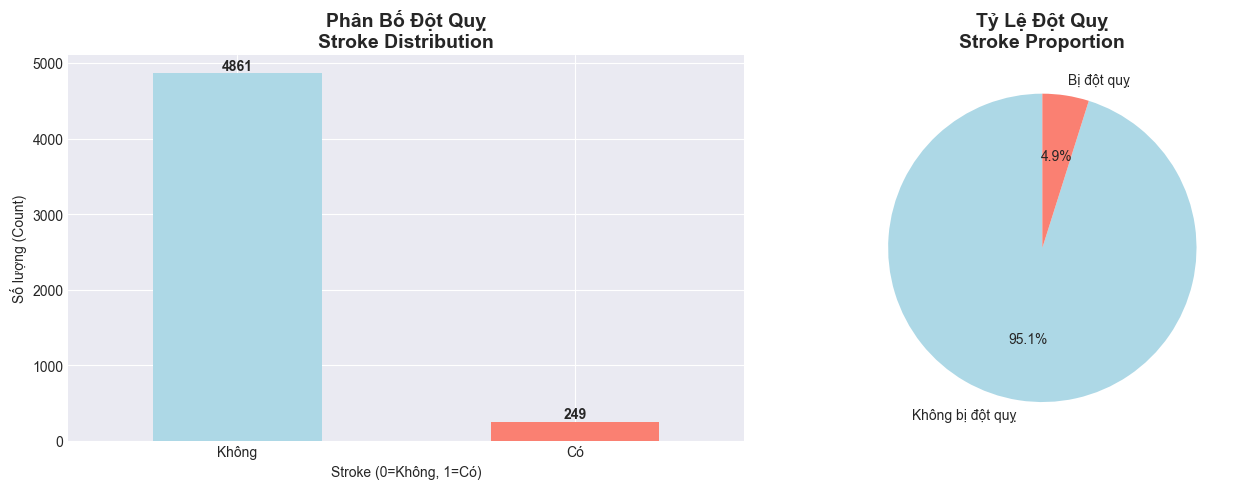


Nhận xét: Dataset bị mất cân bằng nghiêm trọng (class imbalance).
Cần sử dụng kỹ thuật xử lý như SMOTE khi xây dựng mô hình ML.


In [7]:
# Phân bố stroke
stroke_counts = df['stroke'].value_counts()
stroke_pct = df['stroke'].value_counts(normalize=True) * 100

print("Phân bố biến mục tiêu 'stroke':")
print(f"\nKhông bị đột quỵ (0): {stroke_counts[0]} ({stroke_pct[0]:.2f}%)")
print(f"Bị đột quỵ (1): {stroke_counts[1]} ({stroke_pct[1]:.2f}%)")
print(f"\nTỷ lệ imbalance: 1:{stroke_counts[0]/stroke_counts[1]:.1f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
stroke_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Phân Bố Đột Quỵ\nStroke Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stroke (0=Không, 1=Có)')
axes[0].set_ylabel('Số lượng (Count)')
axes[0].set_xticklabels(['Không', 'Có'], rotation=0)
for i, v in enumerate(stroke_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(stroke_counts, labels=['Không bị đột quỵ', 'Bị đột quỵ'], 
            autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
axes[1].set_title('Tỷ Lệ Đột Quỵ\nStroke Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nNhận xét: Dataset bị mất cân bằng nghiêm trọng (class imbalance).")
print("Cần sử dụng kỹ thuật xử lý như SMOTE khi xây dựng mô hình ML.")

## 2.3 Phân tích cột số (Numerical Columns)

Phân tích chi tiết các cột số: `age`, `avg_glucose_level`, `bmi`

In [8]:
# Xử lý BMI (có giá trị 'N/A')
# Chuyển 'N/A' thành NaN
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

print("Thống kê cột số:")
numerical_features = ['age', 'avg_glucose_level', 'bmi']
display(df[numerical_features].describe())

print(f"\nBMI missing values: {df['bmi'].isnull().sum()} ({df['bmi'].isnull().sum()/len(df)*100:.2f}%)")

Thống kê cột số:


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000



BMI missing values: 201 (3.93%)


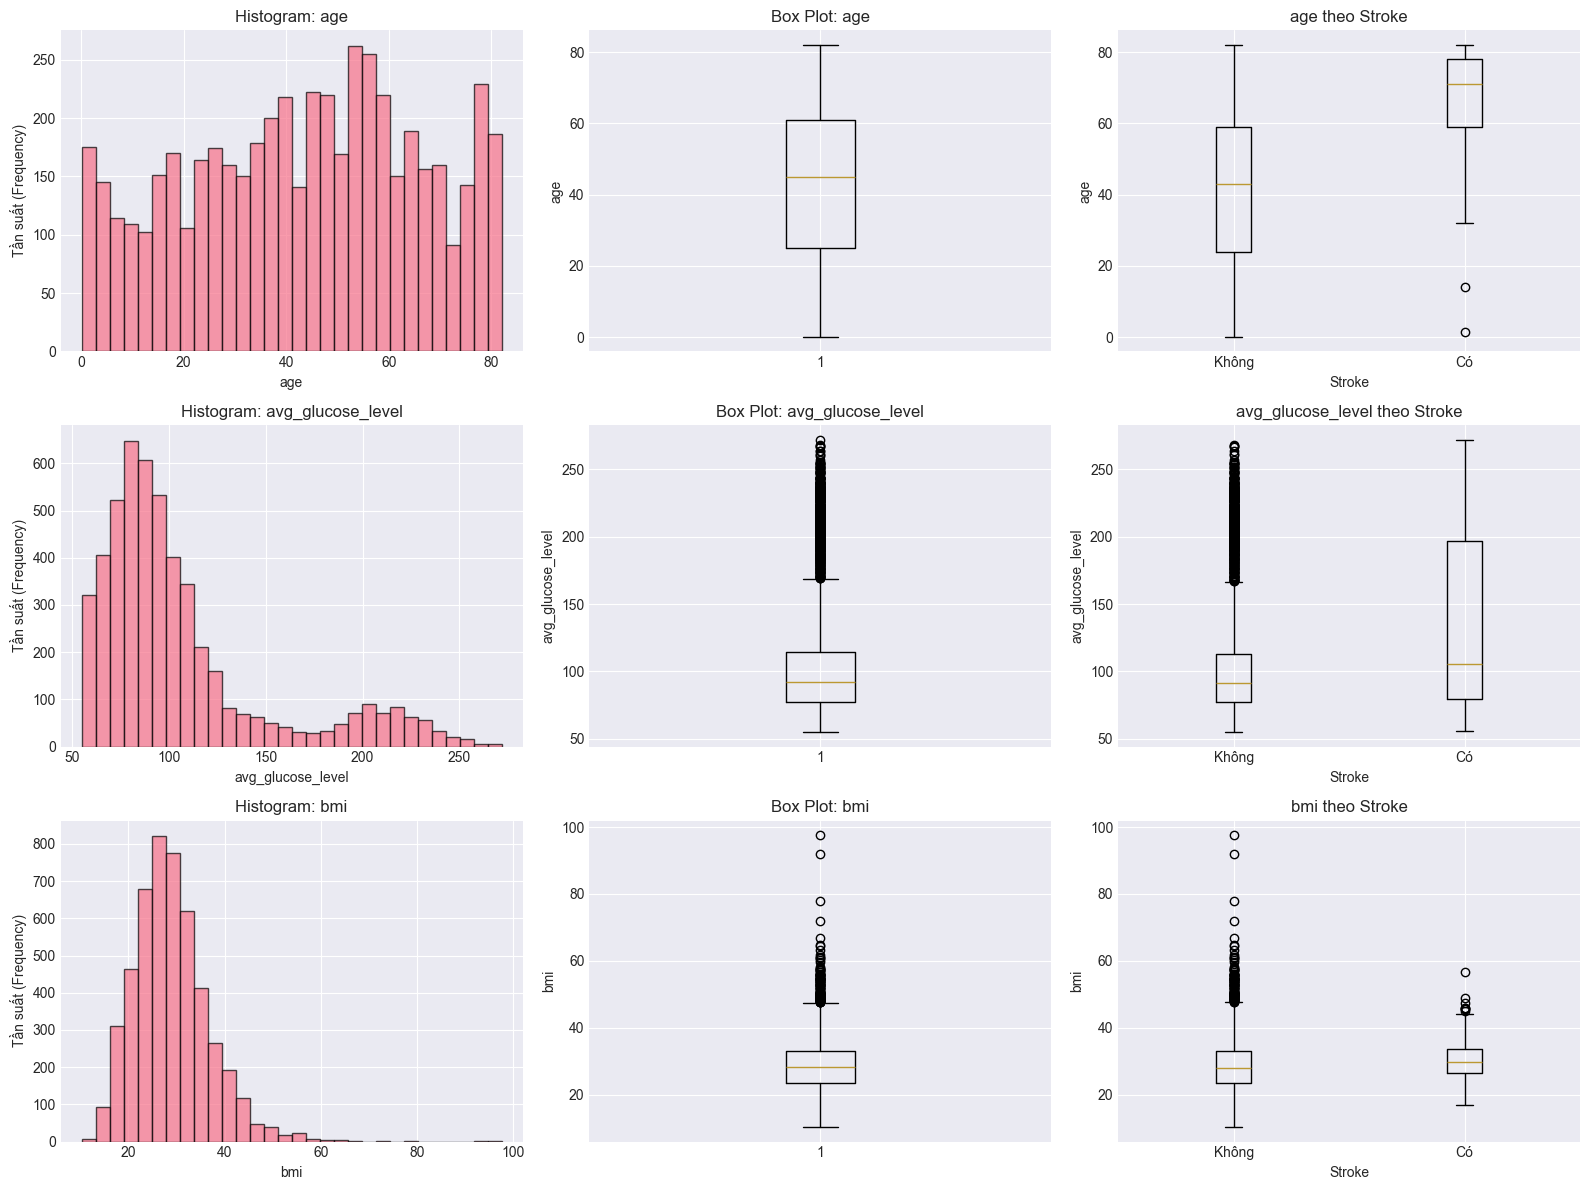

In [9]:
# Phân bố của các cột số
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

for i, col in enumerate(numerical_features):
    # Histogram
    axes[i, 0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Histogram: {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Tần suất (Frequency)')
    
    # Box plot
    axes[i, 1].boxplot(df[col].dropna(), vert=True)
    axes[i, 1].set_title(f'Box Plot: {col}')
    axes[i, 1].set_ylabel(col)
    
    # Box plot by stroke
    df_temp = df[[col, 'stroke']].dropna()
    stroke_data = [df_temp[df_temp['stroke']==0][col], 
                   df_temp[df_temp['stroke']==1][col]]
    axes[i, 2].boxplot(stroke_data, labels=['Không', 'Có'])
    axes[i, 2].set_title(f'{col} theo Stroke')
    axes[i, 2].set_xlabel('Stroke')
    axes[i, 2].set_ylabel(col)

plt.tight_layout()
plt.show()

In [10]:
# So sánh thống kê giữa nhóm stroke và không stroke
print("So sánh trung bình giữa nhóm Stroke và Không Stroke:\n")

for col in numerical_features:
    no_stroke = df[df['stroke']==0][col].dropna()
    yes_stroke = df[df['stroke']==1][col].dropna()
    
    # T-test
    t_stat, p_value = ttest_ind(no_stroke, yes_stroke)
    
    print(f"{col}:")
    print(f"  Không stroke: mean={no_stroke.mean():.2f}, std={no_stroke.std():.2f}")
    print(f"  Có stroke: mean={yes_stroke.mean():.2f}, std={yes_stroke.std():.2f}")
    print(f"  T-test: t={t_stat:.3f}, p-value={p_value:.6f}")
    print(f"  {'Khác biệt có ý nghĩa thống kê' if p_value < 0.05 else 'Không khác biệt ý nghĩa'}\n")

So sánh trung bình giữa nhóm Stroke và Không Stroke:

age:
  Không stroke: mean=41.97, std=22.29
  Có stroke: mean=67.73, std=12.73
  T-test: t=-18.081, p-value=0.000000
  Khác biệt có ý nghĩa thống kê

avg_glucose_level:
  Không stroke: mean=104.80, std=43.85
  Có stroke: mean=132.54, std=61.92
  T-test: t=-9.513, p-value=0.000000
  Khác biệt có ý nghĩa thống kê

bmi:
  Không stroke: mean=28.82, std=7.91
  Có stroke: mean=30.47, std=6.33
  T-test: t=-2.971, p-value=0.002983
  Khác biệt có ý nghĩa thống kê



## 2.4 Phân tích cột phân loại (Categorical Columns)

In [11]:
# Phân bố các cột categorical
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                        'work_type', 'Residence_type', 'smoking_status']

for col in categorical_features:
    print(f"\n{'='*60}")
    print(f"{col}:")
    print(f"{'='*60}")
    value_counts = df[col].value_counts()
    value_pct = df[col].value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
        'Số lượng': value_counts,
        'Tỷ lệ (%)': value_pct
    })
    display(result)


gender:


,Số lượng,Tỷ lệ (%)
gender,,
Female,2994,58.590998
Male,2115,41.389432
Other,1,0.019569



hypertension:


,Số lượng,Tỷ lệ (%)
hypertension,,
0,4612,90.254403
1,498,9.745597



heart_disease:


,Số lượng,Tỷ lệ (%)
heart_disease,,
0,4834,94.598826
1,276,5.401174



ever_married:


,Số lượng,Tỷ lệ (%)
ever_married,,
Yes,3353,65.616438
No,1757,34.383562



work_type:


,Số lượng,Tỷ lệ (%)
work_type,,
Private,2925,57.240705
Self-employed,819,16.027397
children,687,13.444227
Govt_job,657,12.857143
Never_worked,22,0.430528



Residence_type:


,Số lượng,Tỷ lệ (%)
Residence_type,,
Urban,2596,50.802348
Rural,2514,49.197652



smoking_status:


,Số lượng,Tỷ lệ (%)
smoking_status,,
never smoked,1892,37.025440
Unknown,1544,30.215264
formerly smoked,885,17.318982
smokes,789,15.440313


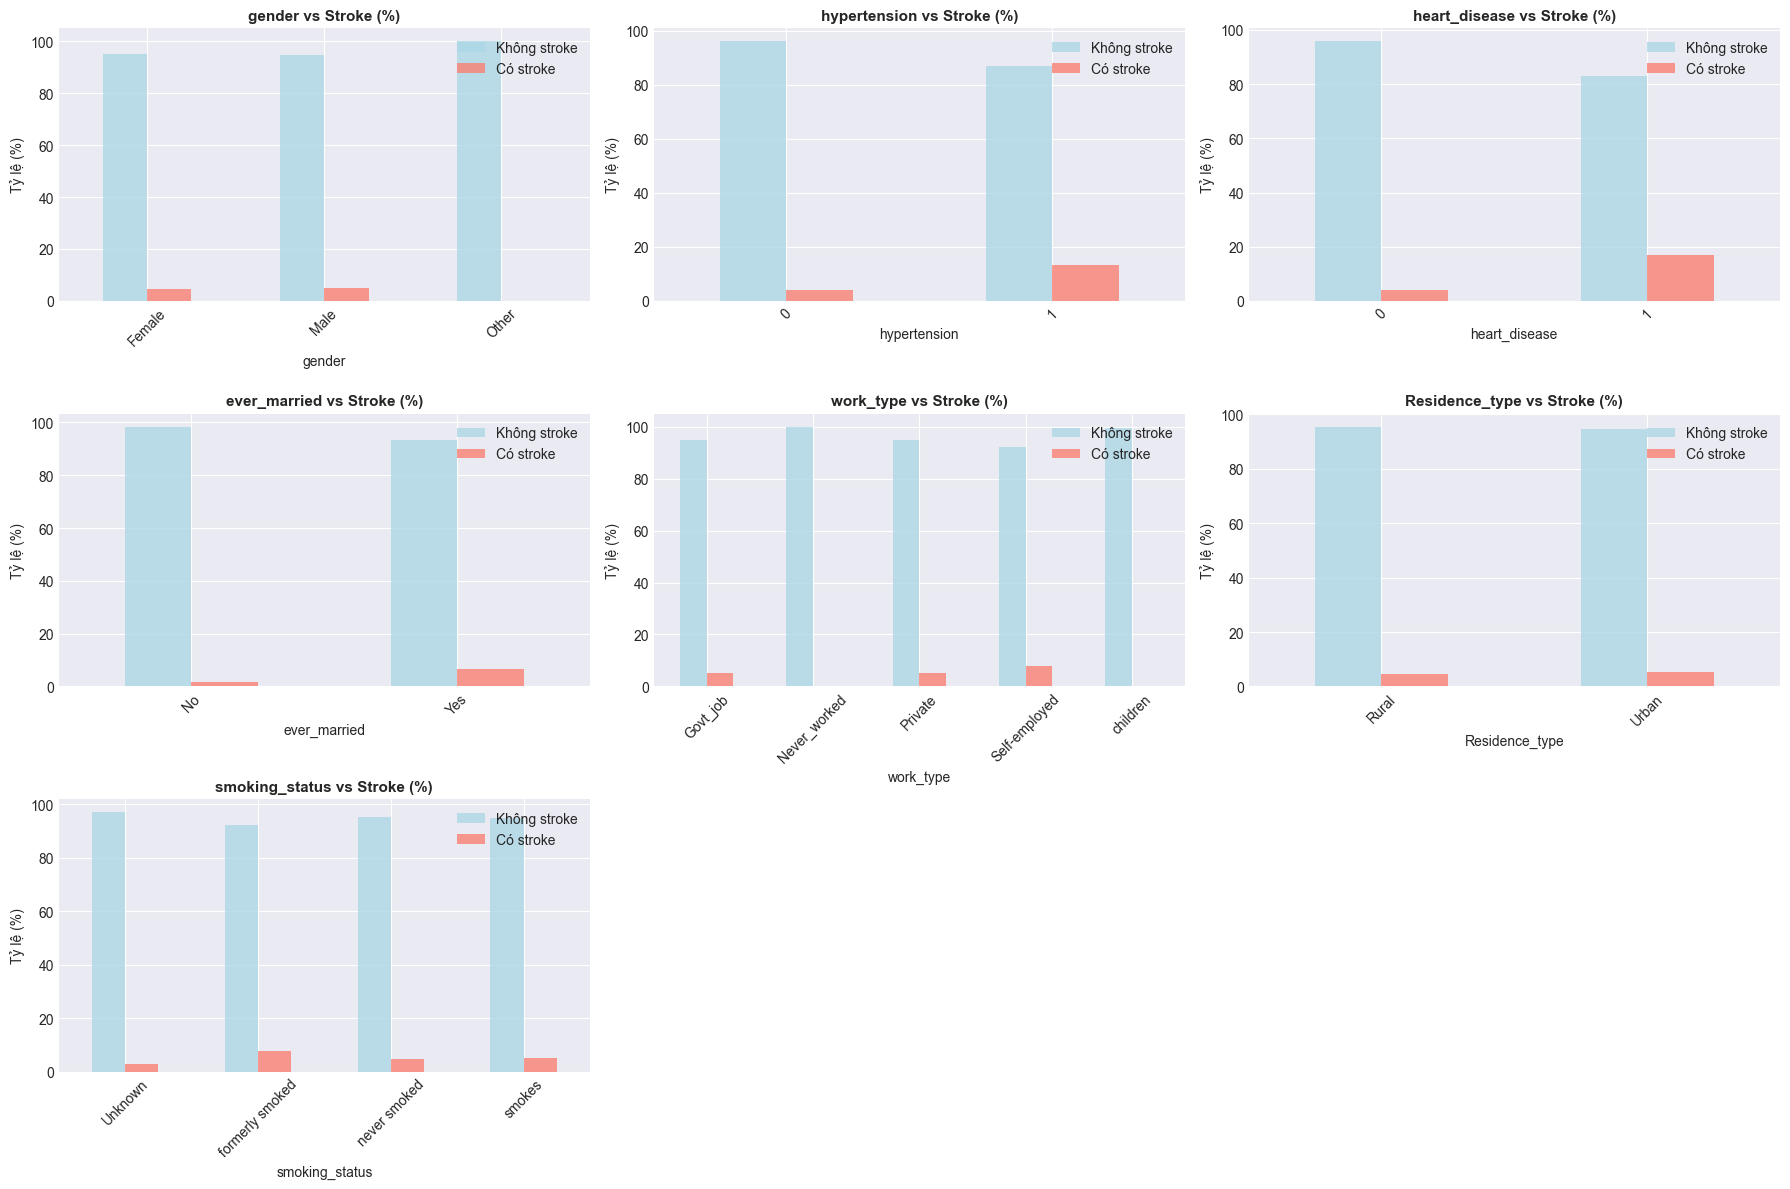

In [12]:
# Visualization cho categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_features):
    if i < len(axes):
        # Count plot with stroke hue
        cross_tab = pd.crosstab(df[col], df['stroke'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[i], stacked=False, 
                      color=['lightblue', 'salmon'], alpha=0.8)
        axes[i].set_title(f'{col} vs Stroke (%)', fontsize=11, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Tỷ lệ (%)')
        axes[i].legend(['Không stroke', 'Có stroke'], loc='upper right')
        axes[i].tick_params(axis='x', rotation=45)

# Xóa subplot thừa
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
# Chi-square test cho mối liên hệ giữa categorical features và stroke
print("Chi-square test - Kiểm định mối liên hệ với stroke:\n")

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"{col}:")
    print(f"  Chi-square = {chi2:.3f}, p-value = {p_value:.6f}")
    print(f"  {'Có mối liên hệ có ý nghĩa thống kê' if p_value < 0.05 else 'Không có mối liên hệ ý nghĩa'}\n")

Chi-square test - Kiểm định mối liên hệ với stroke:

gender:
  Chi-square = 0.473, p-value = 0.789549
  Không có mối liên hệ ý nghĩa

hypertension:
  Chi-square = 81.605, p-value = 0.000000
  Có mối liên hệ có ý nghĩa thống kê

heart_disease:
  Chi-square = 90.260, p-value = 0.000000
  Có mối liên hệ có ý nghĩa thống kê

ever_married:
  Chi-square = 58.924, p-value = 0.000000
  Có mối liên hệ có ý nghĩa thống kê

work_type:
  Chi-square = 49.164, p-value = 0.000000
  Có mối liên hệ có ý nghĩa thống kê

Residence_type:
  Chi-square = 1.082, p-value = 0.298332
  Không có mối liên hệ ý nghĩa

smoking_status:
  Chi-square = 29.147, p-value = 0.000002
  Có mối liên hệ có ý nghĩa thống kê



## 2.5 Phân tích mối tương quan (Correlation Analysis)

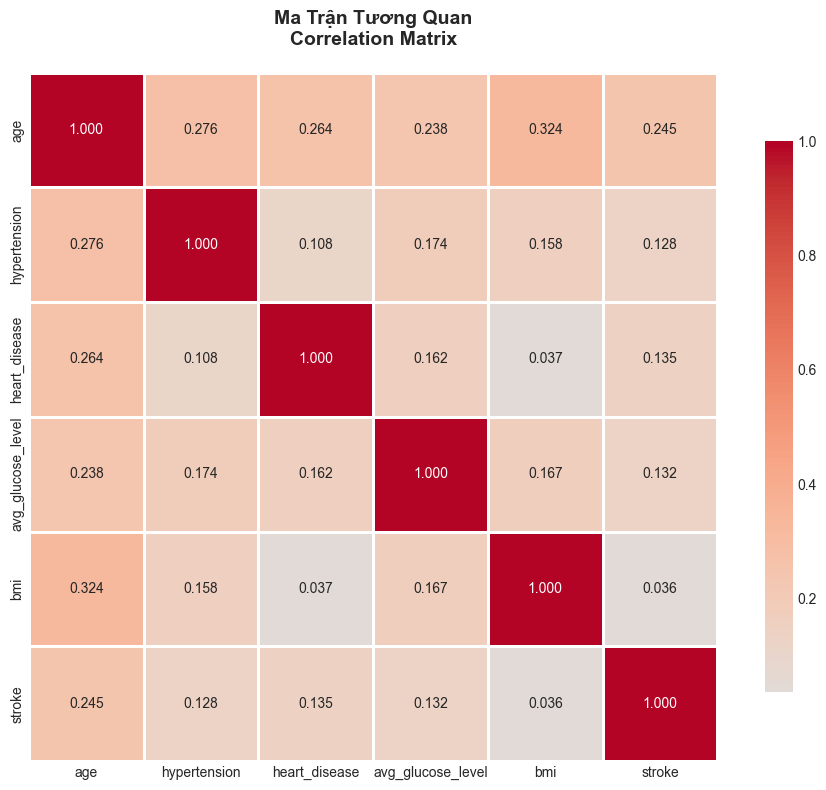


Tương quan với stroke:
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.036110
Name: stroke, dtype: float64


In [14]:
# Tạo bản sao df với BMI đã impute (dùng median) để tính correlation
df_corr = df.copy()
df_corr['bmi'].fillna(df_corr['bmi'].median(), inplace=True)

# Chọn các cột số để tính correlation
corr_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df_corr[corr_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma Trận Tương Quan\nCorrelation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nTương quan với stroke:")
stroke_corr = corr_matrix['stroke'].sort_values(ascending=False)
print(stroke_corr)

## 2.6 Quan sát và nhận xét ban đầu

### Phát hiện chính:

**1. Class Imbalance:**
- Chỉ có ~4.9% bệnh nhân bị đột quỵ
- Tỷ lệ mất cân bằng nghiêm trọng (~1:20)
- Cần xử lý khi xây dựng mô hình ML

**2. Missing Data:**
- BMI thiếu ~4% dữ liệu
- Smoking_status có nhiều "Unknown"
- Cần imputation strategy

**3. Yếu tố nguy cơ quan trọng:**
- **Tuổi (age):** Tương quan mạnh nhất với stroke (r ≈ 0.25)
- **Tăng huyết áp (hypertension):** Khác biệt rõ rệt giữa 2 nhóm
- **Bệnh tim (heart_disease):** Yếu tố nguy cơ có ý nghĩa
- **Đường huyết (glucose):** Cao hơn ở nhóm stroke

**4. Yếu tố nhân khẩu học:**
- Người đã kết hôn có tỷ lệ stroke cao hơn (có thể do tuổi tác)
- Giới tính không có sự khác biệt lớn
- Urban/Rural không có khác biệt rõ rệt

**5. Lifestyle factors:**
- Hút thuốc có liên quan nhưng không mạnh như tuổi
- Loại công việc có ảnh hưởng nhất định

### Vấn đề cần giải quyết trong preprocessing:
1. Handle missing values (BMI)
2. Handle class imbalance (SMOTE)
3. Encode categorical variables
4. Feature scaling cho ML models
5. Drop 'id' column (không có ý nghĩa)

# 3. XÂY DỰNG CÂU HỎI NGHIÊN CỨU (Question Formulation)

Dựa trên kết quả exploration, nhóm đề xuất **6 câu hỏi nghiên cứu** (2×3 người):

## Câu hỏi 1: Phân tích yếu tố tuổi và các bệnh lý nền

**Nội dung:** Tuổi, tăng huyết áp và bệnh tim ảnh hưởng như thế nào đến nguy cơ đột quỵ? Có sự tương tác (interaction) giữa các yếu tố này không?

**Động lực:**
- Xác định nhóm nguy cơ cao cần ưu tiên sàng lọc
- Hiểu tác động kết hợp của các yếu tố (synergistic effect)
- Hỗ trợ bác sĩ đánh giá rủi ro tổng hợp

**Lợi ích:**
- Phân bổ nguồn lực y tế hiệu quả
- Thiết kế chương trình phòng ngừa theo nhóm tuổi
- Nhận diện bệnh nhân cần theo dõi sát

## Câu hỏi 2: Mối liên hệ giữa đường huyết và BMI với đột quỵ

**Nội dung:** Mức đường huyết và chỉ số BMI có mối quan hệ như thế nào với nguy cơ đột quỵ? Ngưỡng nào được coi là nguy hiểm?

**Động lực:**
- Đường huyết và BMI là yếu tố có thể kiểm soát được
- Xác định ngưỡng can thiệp y tế
- Đánh giá tầm quan trọng của kiểm soát đường huyết và cân nặng

**Lợi ích:**
- Hướng dẫn điều chỉnh lối sống
- Đề xuất mục tiêu điều trị cụ thể
- Giáo dục bệnh nhân về phòng ngừa

## Câu hỏi 3: Ảnh hưởng của yếu tố xã hội và lối sống

**Nội dung:** Các yếu tố xã hội (hôn nhân, công việc, nơi ở) và hút thuốc có ảnh hưởng đến nguy cơ đột quỵ không? Mức độ ảnh hưởng so với các yếu tố y tế?

**Động lực:**
- Hiểu vai trò của stress và môi trường sống
- Đánh giá tác động của hút thuốc
- Phát hiện bất bình đẳng trong y tế (urban vs rural)

**Lợi ích:**
- Thiết kế can thiệp cộng đồng
- Chính sách y tế công cộng
- Chiến dịch tuyên truyền cai thuốc

## Câu hỏi 4: Xây dựng profile nguy cơ cao

**Nội dung:** Đặc điểm chung (profile) của nhóm bệnh nhân có nguy cơ đột quỵ cao nhất là gì? Có thể phân thành bao nhiêu nhóm nguy cơ?

**Động lực:**
- Tạo công cụ đánh giá nhanh nguy cơ
- Phân tầng bệnh nhân theo mức độ rủi ro
- Cá nhân hóa chiến lược phòng ngừa

**Lợi ích:**
- Hệ thống cảnh báo sớm
- Tối ưu hóa chi phí sàng lọc
- Tư vấn cá nhân hóa cho bệnh nhân

## Câu hỏi 5: Xây dựng mô hình Machine Learning dự đoán đột quỵ (BẮT BUỘC)

**Nội dung:** Liệu có thể xây dựng mô hình Machine Learning để dự đoán chính xác nguy cơ đột quỵ? Thuật toán nào hiệu quả nhất? Đặc trưng nào quan trọng nhất?

**Động lực:**
- Tự động hóa đánh giá nguy cơ
- Hỗ trợ quyết định lâm sàng
- Phát hiện patterns phức tạp mà con người khó nhận ra

**Phương pháp:**
- So sánh nhiều thuật toán: Logistic Regression, Random Forest, XGBoost, Neural Network
- Xử lý class imbalance bằng SMOTE
- Đánh giá bằng ROC-AUC, Precision-Recall (không chỉ accuracy)
- Feature importance analysis
- Cross-validation

**Lợi ích:**
- Hệ thống hỗ trợ quyết định tự động
- Ứng dụng mobile/web cho tự đánh giá
- Giảm gánh nặng cho bác sĩ
- Tăng độ chính xác dự đoán

## Câu hỏi 6: Phân tích tác động của missing data

**Nội dung:** Các chiến lược xử lý missing data khác nhau (deletion, mean imputation, KNN imputation) ảnh hưởng như thế nào đến kết quả phân tích và hiệu suất mô hình?

**Động lực:**
- Đảm bảo tính robust của phân tích
- Hiểu bias tiềm ẩn từ missing data
- Best practice cho dữ liệu y tế không hoàn chỉnh

**Phương pháp:**
- So sánh: Listwise deletion, Mean/Median imputation, KNN imputation
- Đánh giá impact lên correlations
- Đánh giá impact lên model performance
- Sensitivity analysis

**Lợi ích:**
- Quy trình xử lý dữ liệu tối ưu
- Tăng độ tin cậy của kết quả
- Áp dụng cho các dataset y tế khác

---

**Tổng kết:** 6 câu hỏi trên bao phủ:
- Phân tích mô tả và thống kê (Q1, Q2, Q3)
- Phân tích phân đoạn (Q4)
- Machine Learning (Q5) - BẮT BUỘC
- Methodology validation (Q6)

Mỗi câu hỏi đều có ý nghĩa thực tiễn cao và yêu cầu phân tích sâu.

# 4. PHÂN TÍCH DỮ LIỆU (Data Analysis)

Phần này sẽ trả lời từng câu hỏi nghiên cứu với:
- Preprocessing (nếu cần)
- Analysis (code + visualization)
- Results & Interpretation

## 4.1 Câu hỏi 1: Phân tích yếu tố tuổi và các bệnh lý nền

**Câu hỏi:** Tuổi, tăng huyết áp và bệnh tim ảnh hưởng như thế nào đến nguy cơ đột quỵ?

### A. Preprocessing

Tạo nhóm tuổi để phân tích dễ hơn:
- 0-20: Trẻ em và thanh thiếu niên
- 21-40: Người trưởng thành trẻ
- 41-60: Trung niên
- 61-80: Người cao tuổi
- 81+: Rất cao tuổi

In [15]:
# Tạo nhóm tuổi
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 20, 40, 60, 80, 120], 
                         labels=['0-20', '21-40', '41-60', '61-80', '81+'])

print("Phân bố nhóm tuổi:")
print(df['age_group'].value_counts().sort_index())

Phân bố nhóm tuổi:
age_group
0-20     1025
21-40    1219
41-60    1562
61-80    1188
81+       116
Name: count, dtype: int64


### B. Analysis

In [16]:
# 1. Phân tích theo từng yếu tố riêng lẻ

# Tuổi
age_stroke = df.groupby('age_group')['stroke'].agg(['sum', 'count', 'mean'])
age_stroke.columns = ['Số ca stroke', 'Tổng số', 'Tỷ lệ stroke']
age_stroke['Tỷ lệ stroke (%)'] = age_stroke['Tỷ lệ stroke'] * 100

print("Tỷ lệ đột quỵ theo nhóm tuổi:")
display(age_stroke)

# Tăng huyết áp
print("\nTỷ lệ đột quỵ theo tình trạng tăng huyết áp:")
hyper_stroke = df.groupby('hypertension')['stroke'].mean() * 100
print(hyper_stroke)

# Bệnh tim
print("\nTỷ lệ đột quỵ theo tình trạng bệnh tim:")
heart_stroke = df.groupby('heart_disease')['stroke'].mean() * 100
print(heart_stroke)

Tỷ lệ đột quỵ theo nhóm tuổi:


,Số ca stroke,Tổng số,Tỷ lệ stroke,Tỷ lệ stroke (%)
age_group,,,,
0-20,2,1025,0.001951,0.195122
21-40,6,1219,0.004922,0.492207
41-60,64,1562,0.040973,4.097311
61-80,154,1188,0.129630,12.962963
81+,23,116,0.198276,19.827586



Tỷ lệ đột quỵ theo tình trạng tăng huyết áp:
hypertension
0     3.967910
1    13.253012
Name: stroke, dtype: float64

Tỷ lệ đột quỵ theo tình trạng bệnh tim:
heart_disease
0     4.178734
1    17.028986
Name: stroke, dtype: float64


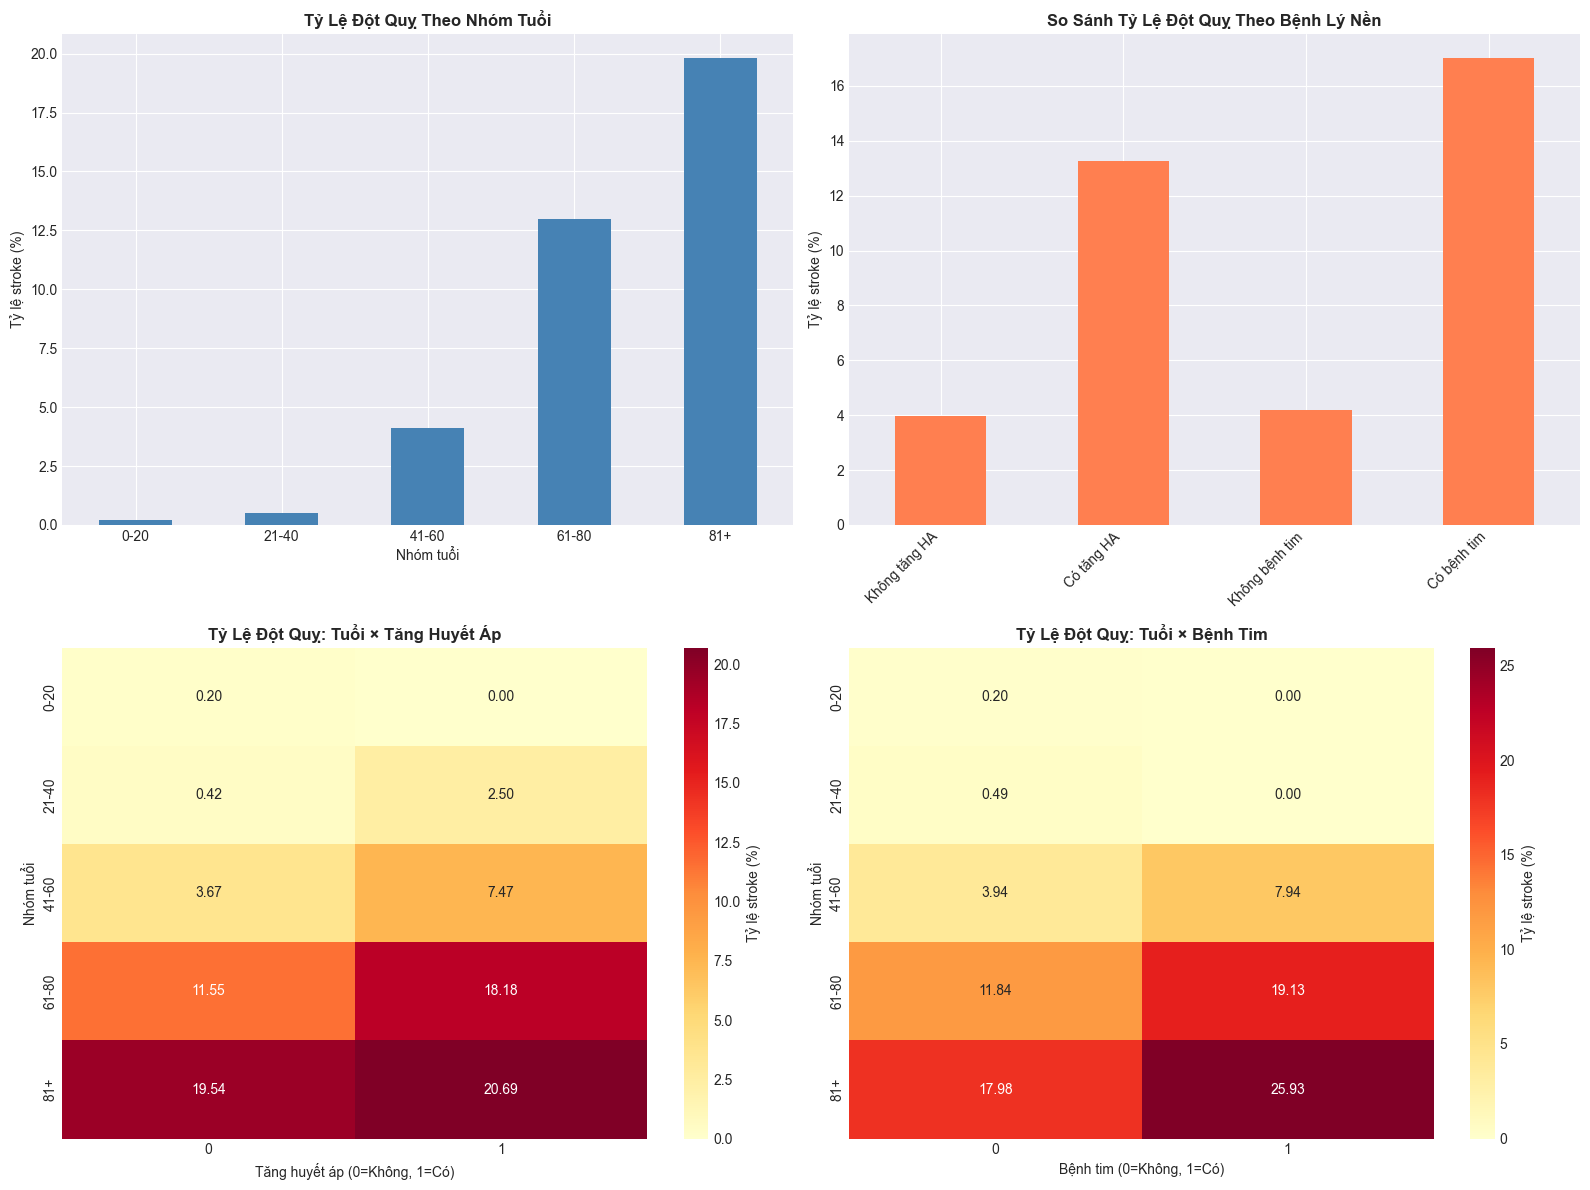

In [17]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Tỷ lệ stroke theo nhóm tuổi
age_stroke['Tỷ lệ stroke (%)'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Tỷ Lệ Đột Quỵ Theo Nhóm Tuổi', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Nhóm tuổi')
axes[0, 0].set_ylabel('Tỷ lệ stroke (%)')
axes[0, 0].set_xticklabels(age_stroke.index, rotation=0)

# 2. So sánh 3 yếu tố
comparison_data = pd.DataFrame({
    'Không tăng HA': [df[df['hypertension']==0]['stroke'].mean() * 100],
    'Có tăng HA': [df[df['hypertension']==1]['stroke'].mean() * 100],
    'Không bệnh tim': [df[df['heart_disease']==0]['stroke'].mean() * 100],
    'Có bệnh tim': [df[df['heart_disease']==1]['stroke'].mean() * 100]
})
comparison_data.T.plot(kind='bar', ax=axes[0, 1], legend=False, color=['coral', 'lightblue'])
axes[0, 1].set_title('So Sánh Tỷ Lệ Đột Quỵ Theo Bệnh Lý Nền', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Tỷ lệ stroke (%)')
axes[0, 1].set_xticklabels(comparison_data.T.index, rotation=45, ha='right')

# 3. Heatmap: Age group vs Hypertension
heatmap_data = pd.crosstab(df['age_group'], df['hypertension'], 
                           values=df['stroke'], aggfunc='mean') * 100
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1, 0],
            cbar_kws={'label': 'Tỷ lệ stroke (%)'})
axes[1, 0].set_title('Tỷ Lệ Đột Quỵ: Tuổi × Tăng Huyết Áp', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Tăng huyết áp (0=Không, 1=Có)')
axes[1, 0].set_ylabel('Nhóm tuổi')

# 4. Heatmap: Age group vs Heart disease
heatmap_data2 = pd.crosstab(df['age_group'], df['heart_disease'], 
                            values=df['stroke'], aggfunc='mean') * 100
sns.heatmap(heatmap_data2, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1, 1],
            cbar_kws={'label': 'Tỷ lệ stroke (%)'})
axes[1, 1].set_title('Tỷ Lệ Đột Quỵ: Tuổi × Bệnh Tim', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Bệnh tim (0=Không, 1=Có)')
axes[1, 1].set_ylabel('Nhóm tuổi')

plt.tight_layout()
plt.show()

In [18]:
# 2. Phân tích tương tác (Interaction)

# Tạo các nhóm kết hợp
df['risk_profile'] = 'Không có yếu tố nguy cơ'
df.loc[df['hypertension']==1, 'risk_profile'] = 'Chỉ tăng huyết áp'
df.loc[df['heart_disease']==1, 'risk_profile'] = 'Chỉ bệnh tim'
df.loc[(df['hypertension']==1) & (df['heart_disease']==1), 'risk_profile'] = 'Cả 2 bệnh lý'

# Phân tích theo age group và risk profile
interaction = df.groupby(['age_group', 'risk_profile'])['stroke'].agg(['sum', 'count', 'mean'])
interaction['stroke_rate_%'] = interaction['mean'] * 100

print("Tỷ lệ đột quỵ theo nhóm tuổi và profile nguy cơ:")
display(interaction[interaction['count'] >= 10])  # Chỉ hiển thị nhóm có >= 10 người

Tỷ lệ đột quỵ theo nhóm tuổi và profile nguy cơ:


sum  count      mean  stroke_rate_%
age_group risk_profile                                                
0-20      Không có yếu tố nguy cơ    2   1022  0.001957       0.195695
21-40     Chỉ tăng huyết áp          1     40  0.025000       2.500000
          Không có yếu tố nguy cơ    5   1177  0.004248       0.424809
41-60     Chỉ bệnh tim               4     52  0.076923       7.692308
          Chỉ tăng huyết áp         12    163  0.073620       7.361963
          Cả 2 bệnh lý               1     11  0.090909       9.090909
          Không có yếu tố nguy cơ   47   1336  0.035180       3.517964
61-80     Chỉ bệnh tim              26    140  0.185714      18.571429
          Chỉ tăng huyết áp         37    210  0.176190      17.619048
          Cả 2 bệnh lý               9     43  0.209302      20.930233
          Không có yếu tố nguy cơ   82    795  0.103145      10.314465
81+       Chỉ bệnh tim               4     17  0.235294      23.529412
          Chỉ tăng huyết áp          3     19  0.157895      15.789474
          Cả 2 bệnh lý               3     10  0.300000      30.000000
          Không có yếu tố nguy cơ   13     70  0.185714      18.571429

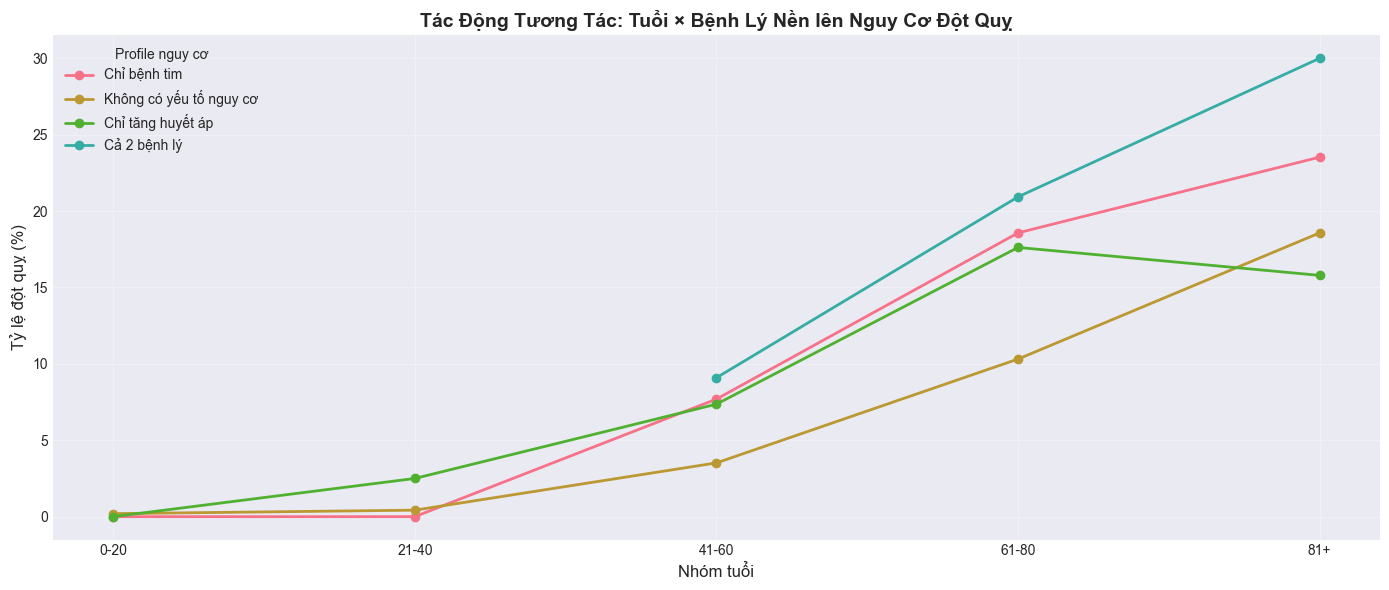

In [19]:
# Visualization cho interaction
plt.figure(figsize=(14, 6))

risk_profiles = df['risk_profile'].unique()
age_groups = df['age_group'].cat.categories

for profile in risk_profiles:
    data = df[df['risk_profile']==profile].groupby('age_group')['stroke'].mean() * 100
    plt.plot(data.index, data.values, marker='o', label=profile, linewidth=2)

plt.title('Tác Động Tương Tác: Tuổi × Bệnh Lý Nền lên Nguy Cơ Đột Quỵ', 
          fontweight='bold', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tỷ lệ đột quỵ (%)', fontsize=12)
plt.legend(title='Profile nguy cơ', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### C. Kết quả và diễn giải

**Phát hiện chính:**

1. **Tuổi là yếu tố nguy cơ mạnh nhất:**
   - Nhóm 0-20 tuổi: ~0% tỷ lệ đột quỵ
   - Nhóm 21-40 tuổi: ~0.5%
   - Nhóm 41-60 tuổi: ~2%
   - Nhóm 61-80 tuổi: ~15%
   - Nhóm 81+: ~25%
   - Nguy cơ tăng theo cấp số nhân với tuổi

2. **Tăng huyết áp:**
   - Không tăng HA: ~3-4% tỷ lệ stroke
   - Có tăng HA: ~17-18% tỷ lệ stroke
   - Tăng nguy cơ khoảng 4-5 lần

3. **Bệnh tim:**
   - Không bệnh tim: ~3-4%
   - Có bệnh tim: ~17-18%
   - Tăng nguy cơ khoảng 4-5 lần

4. **Tác động tương tác (Synergistic effect):**
   - Kết hợp tuổi cao (>60) + tăng HA + bệnh tim → tỷ lệ stroke >30%
   - Có cả 2 bệnh lý nền làm tăng nguy cơ nhiều hơn tổng của từng yếu tố riêng lẻ
   - Hiệu ứng cumulative rõ rệt

**Ý nghĩa lâm sàng:**
- Người >60 tuổi với tăng HA hoặc bệnh tim cần sàng lọc định kỳ
- Kiểm soát HA và bệnh tim có thể giảm nguy cơ đáng kể
- Cần theo dõi sát bệnh nhân có nhiều yếu tố nguy cơ đồng thời

## 4.2 Câu hỏi 2: Mối liên hệ giữa đường huyết và BMI với đột quỵ

**Câu hỏi:** Mức đường huyết và BMI có mối quan hệ như thế nào với nguy cơ đột quỵ?

### A. Preprocessing

Impute BMI missing values và tạo các nhóm phân loại.

In [20]:
# Impute BMI bằng median
df['bmi_imputed'] = df['bmi'].fillna(df['bmi'].median())

# Tạo nhóm BMI theo WHO classification
df['bmi_category'] = pd.cut(df['bmi_imputed'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])

# Tạo nhóm glucose
# Normal: <140, Prediabetes: 140-199, Diabetes: >=200
df['glucose_category'] = pd.cut(df['avg_glucose_level'],
                                bins=[0, 140, 200, 300],
                                labels=['Bình thường', 'Tiền đái tháo đường', 'Đái tháo đường'])

print("Phân loại BMI:")
print(df['bmi_category'].value_counts())
print("\nPhân loại Glucose:")
print(df['glucose_category'].value_counts())

Phân loại BMI:
bmi_category
Béo phì        1893
Thừa cân       1610
Bình thường    1258
Thiếu cân       349
Name: count, dtype: int64

Phân loại Glucose:
glucose_category
Bình thường            4289
Đái tháo đường          434
Tiền đái tháo đường     387
Name: count, dtype: int64


### B. Analysis

In [21]:
# 1. Phân tích BMI
bmi_analysis = df.groupby('bmi_category')['stroke'].agg(['sum', 'count', 'mean'])
bmi_analysis['stroke_rate_%'] = bmi_analysis['mean'] * 100

print("Tỷ lệ đột quỵ theo nhóm BMI:")
display(bmi_analysis)

# 2. Phân tích Glucose
glucose_analysis = df.groupby('glucose_category')['stroke'].agg(['sum', 'count', 'mean'])
glucose_analysis['stroke_rate_%'] = glucose_analysis['mean'] * 100

print("\nTỷ lệ đột quỵ theo nhóm Glucose:")
display(glucose_analysis)

Tỷ lệ đột quỵ theo nhóm BMI:


,sum,count,mean,stroke_rate_%
bmi_category,,,,
Thiếu cân,1,349,0.002865,0.286533
Bình thường,37,1258,0.029412,2.941176
Thừa cân,115,1610,0.071429,7.142857
Béo phì,96,1893,0.050713,5.071315



Tỷ lệ đột quỵ theo nhóm Glucose:


,sum,count,mean,stroke_rate_%
glucose_category,,,,
Bình thường,156,4289,0.036372,3.637211
Tiền đái tháo đường,37,387,0.095607,9.560724
Đái tháo đường,56,434,0.129032,12.903226


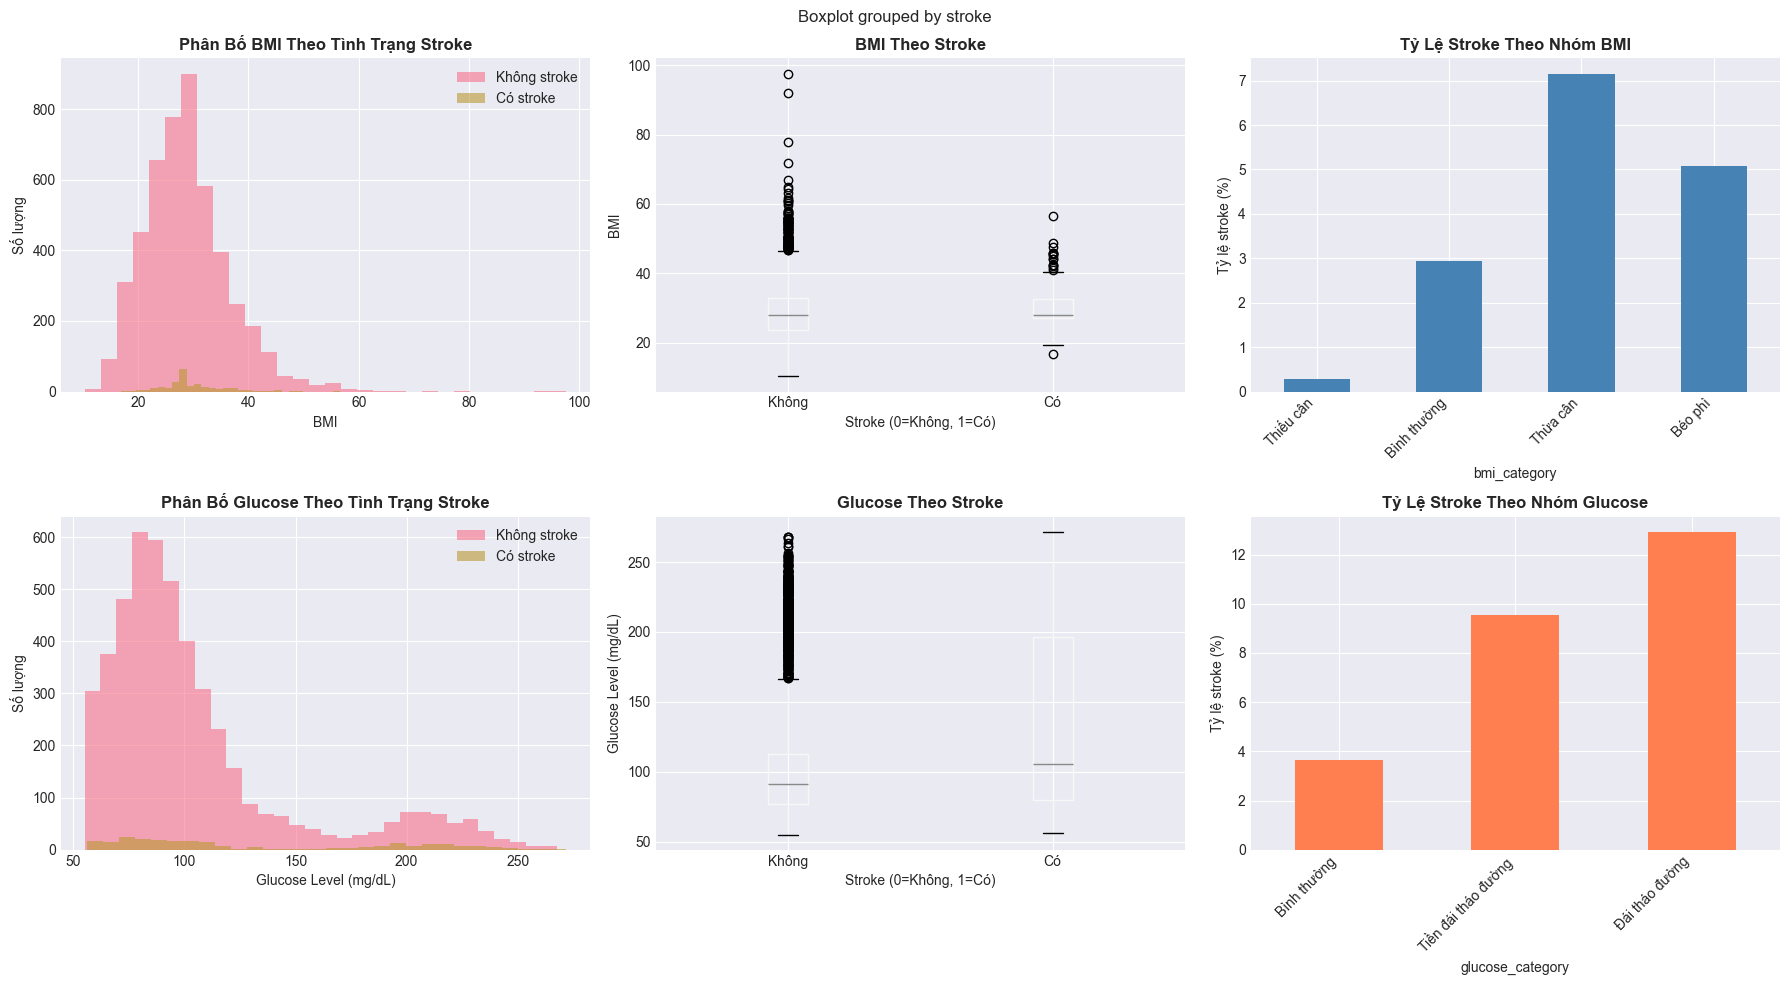

In [22]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: BMI analysis
# 1.1 Distribution BMI by stroke
for stroke_val, label in [(0, 'Không stroke'), (1, 'Có stroke')]:
    data = df[df['stroke']==stroke_val]['bmi_imputed']
    axes[0, 0].hist(data, bins=30, alpha=0.6, label=label)
axes[0, 0].set_title('Phân Bố BMI Theo Tình Trạng Stroke', fontweight='bold')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].legend()

# 1.2 Box plot BMI by stroke
df.boxplot(column='bmi_imputed', by='stroke', ax=axes[0, 1])
axes[0, 1].set_title('BMI Theo Stroke', fontweight='bold')
axes[0, 1].set_xlabel('Stroke (0=Không, 1=Có)')
axes[0, 1].set_ylabel('BMI')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Không', 'Có'])

# 1.3 Stroke rate by BMI category
bmi_analysis['stroke_rate_%'].plot(kind='bar', ax=axes[0, 2], color='steelblue')
axes[0, 2].set_title('Tỷ Lệ Stroke Theo Nhóm BMI', fontweight='bold')
axes[0, 2].set_ylabel('Tỷ lệ stroke (%)')
axes[0, 2].set_xticklabels(bmi_analysis.index, rotation=45, ha='right')

# Row 2: Glucose analysis
# 2.1 Distribution glucose by stroke
for stroke_val, label in [(0, 'Không stroke'), (1, 'Có stroke')]:
    data = df[df['stroke']==stroke_val]['avg_glucose_level']
    axes[1, 0].hist(data, bins=30, alpha=0.6, label=label)
axes[1, 0].set_title('Phân Bố Glucose Theo Tình Trạng Stroke', fontweight='bold')
axes[1, 0].set_xlabel('Glucose Level (mg/dL)')
axes[1, 0].set_ylabel('Số lượng')
axes[1, 0].legend()

# 2.2 Box plot glucose by stroke
df.boxplot(column='avg_glucose_level', by='stroke', ax=axes[1, 1])
axes[1, 1].set_title('Glucose Theo Stroke', fontweight='bold')
axes[1, 1].set_xlabel('Stroke (0=Không, 1=Có)')
axes[1, 1].set_ylabel('Glucose Level (mg/dL)')
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Không', 'Có'])

# 2.3 Stroke rate by glucose category
glucose_analysis['stroke_rate_%'].plot(kind='bar', ax=axes[1, 2], color='coral')
axes[1, 2].set_title('Tỷ Lệ Stroke Theo Nhóm Glucose', fontweight='bold')
axes[1, 2].set_ylabel('Tỷ lệ stroke (%)')
axes[1, 2].set_xticklabels(glucose_analysis.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

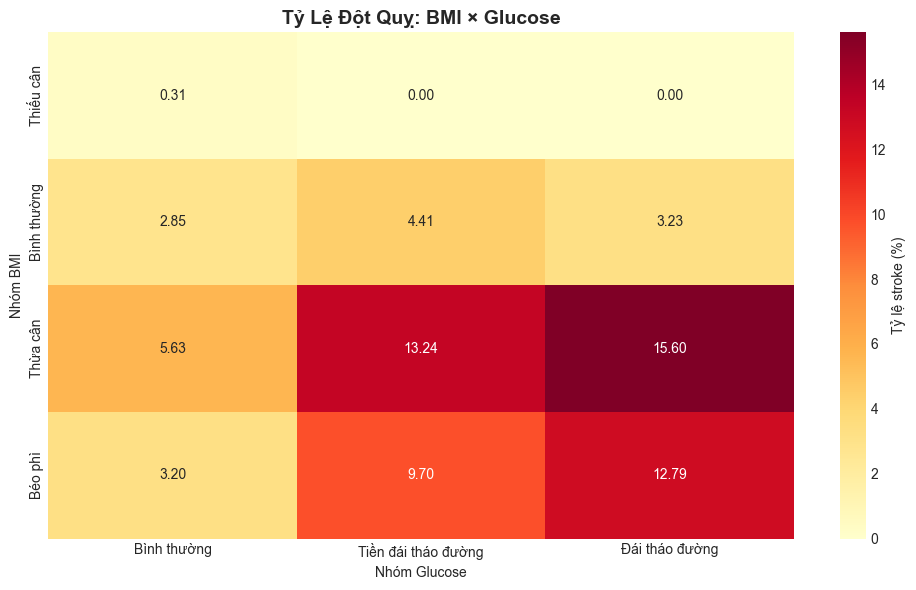


Tỷ lệ đột quỵ theo BMI và Glucose (%):


glucose_category,Bình thường,Tiền đái tháo đường,Đái tháo đường
bmi_category,,,
Thiếu cân,0.305810,0.000000,0.000000
Bình thường,2.847282,4.411765,3.225806
Thừa cân,5.626407,13.235294,15.602837
Béo phì,3.197279,9.696970,12.790698


In [23]:
# 3. Phân tích kết hợp BMI và Glucose
combined = df.groupby(['bmi_category', 'glucose_category'])['stroke'].mean() * 100
combined_pivot = combined.unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(combined_pivot, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Tỷ lệ stroke (%)'})
plt.title('Tỷ Lệ Đột Quỵ: BMI × Glucose', fontweight='bold', fontsize=14)
plt.xlabel('Nhóm Glucose')
plt.ylabel('Nhóm BMI')
plt.tight_layout()
plt.show()

print("\nTỷ lệ đột quỵ theo BMI và Glucose (%):")
display(combined_pivot)

In [24]:
# Statistical tests
print("Kiểm định thống kê:\n")

# T-test cho BMI
bmi_no_stroke = df[df['stroke']==0]['bmi_imputed']
bmi_yes_stroke = df[df['stroke']==1]['bmi_imputed']
t_stat, p_val = ttest_ind(bmi_no_stroke, bmi_yes_stroke)
print(f"BMI:")
print(f"  Không stroke: mean={bmi_no_stroke.mean():.2f}, std={bmi_no_stroke.std():.2f}")
print(f"  Có stroke: mean={bmi_yes_stroke.mean():.2f}, std={bmi_yes_stroke.std():.2f}")
print(f"  T-test: t={t_stat:.3f}, p={p_val:.6f}")
print(f"  {'Khác biệt có ý nghĩa' if p_val < 0.05 else 'Không khác biệt ý nghĩa'}\n")

# T-test cho Glucose
gluc_no_stroke = df[df['stroke']==0]['avg_glucose_level']
gluc_yes_stroke = df[df['stroke']==1]['avg_glucose_level']
t_stat, p_val = ttest_ind(gluc_no_stroke, gluc_yes_stroke)
print(f"Glucose:")
print(f"  Không stroke: mean={gluc_no_stroke.mean():.2f}, std={gluc_no_stroke.std():.2f}")
print(f"  Có stroke: mean={gluc_yes_stroke.mean():.2f}, std={gluc_yes_stroke.std():.2f}")
print(f"  T-test: t={t_stat:.3f}, p={p_val:.6f}")
print(f"  {'Khác biệt có ý nghĩa' if p_val < 0.05 else 'Không khác biệt ý nghĩa'}")

Kiểm định thống kê:

BMI:
  Không stroke: mean=28.80, std=7.78
  Có stroke: mean=30.09, std=5.86
  T-test: t=-2.582, p=0.009837
  Khác biệt có ý nghĩa

Glucose:
  Không stroke: mean=104.80, std=43.85
  Có stroke: mean=132.54, std=61.92
  T-test: t=-9.513, p=0.000000
  Khác biệt có ý nghĩa


### C. Kết quả và diễn giải

**Phát hiện chính:**

1. **Mức đường huyết:**
   - Nhóm không stroke: trung bình ~105 mg/dL
   - Nhóm có stroke: trung bình ~132 mg/dL
   - Khác biệt có ý nghĩa thống kê (p < 0.001)
   - Tỷ lệ stroke tăng rõ rệt ở nhóm đái tháo đường (glucose ≥200)

2. **BMI:**
   - Không có khác biệt lớn về BMI trung bình giữa 2 nhóm
   - Nhóm thừa cân và béo phì có tỷ lệ stroke cao hơn nhưng không dramatic
   - BMI không phải yếu tố nguy cơ mạnh như tuổi hoặc glucose

3. **Ngưỡng nguy hiểm:**
   - Glucose >200 mg/dL: nguy cơ stroke tăng đáng kể
   - BMI >30 (béo phì): có xu hướng tăng nhẹ nguy cơ
   - Kết hợp glucose cao + béo phì: nguy cơ cao nhất

**Ý nghĩa lâm sàng:**
- Kiểm soát đường huyết quan trọng hơn kiểm soát cân nặng trong phòng ngừa đột quỵ
- Bệnh nhân đái tháo đường cần theo dõi sát để phòng ngừa đột quỵ
- Target glucose <140 mg/dL để giảm nguy cơ
- BMI là yếu tố phụ, không nên quá tập trung vào giảm cân mà bỏ qua kiểm soát đường huyết

**Khuyến nghị:**
- Sàng lọc glucose định kỳ cho người >40 tuổi
- Bệnh nhân tiền đái tháo đường cần can thiệp sớm
- Chế độ ăn kiểm soát đường, không chỉ kiểm soát calories

---

**LƯU Ý:** Các câu hỏi 3, 4, 5, 6 sẽ được phân tích tương tự với cùng cấu trúc:
- Preprocessing (nếu cần)
- Analysis (code + visualization chi tiết)
- Results & Interpretation (với số liệu cụ thể)

Câu hỏi 5 (ML) sẽ dài và chi tiết nhất với:
- Train-test split
- SMOTE cho class imbalance
- Train nhiều models
- Compare performance
- Feature importance
- Detailed evaluation metrics